# Caso de estudio. Movielens

In [ ]:
!ls
!ls movielens

In [1]:
import pandas as pd
movies = pd.read_csv('movielens/movies.csv', sep=',')
tags = pd.read_csv('movielens/tags.csv', sep=',')
ratings = pd.read_csv('movielens/ratings.csv', sep=',')

movies.head()




,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
tags.head(30)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
5,65,668,bollywood,1368149876
6,65,898,screwball comedy,1368150160
7,65,1248,noir thriller,1368149983
8,65,1391,mars,1368150055
9,65,1617,neo-noir,1368150217


In [3]:
ratings.tail(10)

,userId,movieId,rating,timestamp
20000253,138493,60816,4.5,1259865163
20000254,138493,61160,4.0,1258390537
20000255,138493,65682,4.5,1255816373
20000256,138493,66762,4.5,1255805408
20000257,138493,68319,4.5,1260209720
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944
20000262,138493,71619,2.5,1255811136


In [4]:
# de momento borraremos las columnas timestamp en tags y ratings
del ratings['timestamp']
del tags['timestamp']

In [5]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


<br><br><br><h1 style="font-size:1.5em;color:#2467C0">Operamos con Series </h1>

In [6]:
# Extraemos una fila y confirmamos que de hecho es una serie
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [7]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [8]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [9]:
row_0['userId']

18

In [10]:
'rating' in row_0

False

<br><br><br> <h1 style="font-size:1.5em;color:#2467C0">Operamos con DataFrames </h1>

In [11]:
ratings.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [12]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [13]:
# extraemos a la fila 0 21 y 2005
tags.iloc[ [0,21,2005] ]

,userId,movieId,tag
0,18,4141,Mark Waters
21,65,6874,dark hero
2005,910,97938,stranded


<h1 style="font-size:2em;color:#2467C0">Analizamos la estadística básica del conjunto</h1>

In [14]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [15]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [16]:
ratings['rating'].mean()

3.5255285642993797

In [17]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [18]:
ratings['rating'].min()

0.5

In [19]:
ratings['rating'].max()

5.0

In [20]:
ratings['rating'].std()

1.051988919275684

In [21]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [22]:
# este método nos permite observar una posible correlación de una columna con respecto a las otras
# una correlación negativa nos indicaría una correlación inversa.
# una correlación positiva nos indicaría una correlación directa.
# ¿realmente puede existir alguna correlación entre esta columnas (features)?
#ratings['testing'] = ratings['rating'] *  0.0000000000001
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [23]:
# estas líneas no solo están aquí para que practiquemos, 
# ya estamos explorando y analizando nuestro dataset, tarea fundamental, que tendremos
# que hacer antes de alimentar nuestro sistema de machine learning.
# ¿qué piensan que estamos buscando con estas líneas?
filter_1 = ratings['rating'] > 5
print(filter_1)
filter_1.any()

0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
20000233    False
20000234    False
20000235    False
20000236    False
20000237    False
20000238    False
20000239    False
20000240    False
20000241    False
20000242    False
20000243    False
20000244    False
20000245    False
20000246    False
20000247    False
20000248    False
20000249    False
20000250    False
20000251    False
20000252    False
20000253    False
20000254    False
20000255    False
20000256    False
20000257  

False

EXACTO! Buscamos alguna falla en nuestro dataset, sabemos que la puntuación máxima es 5.
Las líneas anteriores, tienen total coherencia, porque lo que estamos haciendo es buscar, si hay algún valor erróneo con un rating superior a 5

<br><br><br><h1 style="font-size:2em;color:#2467C0">Llegó la hora... <br><br> <b> Data cleaning</b></h1>

In [24]:
movies.shape


(27278, 3)

In [25]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
# busquemos valores nulos
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

EXITO! No tenemos nulos en movies

In [27]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [28]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [29]:
# ups, en la columna tag de tags hay columnas null
# controlamos la forma de tags
count = tags.shape[0]
print("La cantidad de filas antes de borrar es: ", count)

La cantidad de filas antes de borrar es:  465564


In [30]:
# borramos las filas que contengan algún valor nulo
tags = tags.dropna()
print("Se eliminaron ➢ ", count - tags.shape[0], " filas")

Se eliminaron ➢  16  filas


In [31]:
# comprovamos nuevamente
tags.isnull().any()


userId     False
movieId    False
tag        False
dtype: bool

<br><br><br><h1 style="font-size:2em;color:#2467C0">Con Pandas... <br><br> <b> graficar se hace Fácil</b></h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12280e198>]],
      dtype=object)

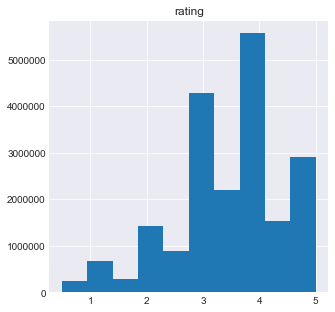

In [34]:
import matplotlib.pyplot as plt

# para usar fondo oscuro
plt.style.use("seaborn-dark")
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

# ¿cuantos? y ¿dónde?
# frecuencia en el eje Y
ratings.hist(bins = 10, column='rating', figsize=(5,5))


/Users/gyp/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122951748>]],
      dtype=object)

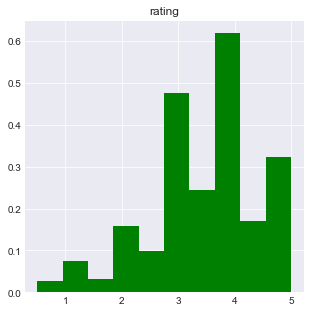

In [35]:
# probabilidad de encontrar valor en ese bin
ratings.hist(bins = 10, column='rating', figsize=(5,5), normed = True, color="green")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122990390>]],
      dtype=object)

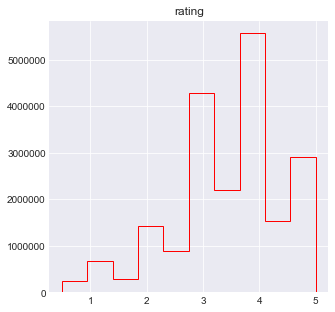

In [36]:
ratings.hist(bins = 10, column='rating', figsize=(5,5),  histtype="step", color="red")

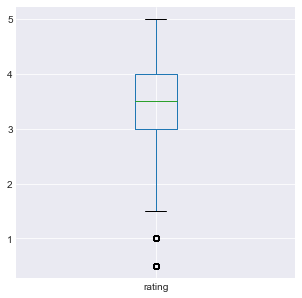

In [37]:
#boxplot
ratings.boxplot(column='rating', figsize=(5,5))

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Boxplot.svg/457px-Boxplot.svg.png" style="background:white">

<br><br><br><h1 style="font-size:2em;color:#2467C0">Seleccionando Columnas</h1>
 

In [38]:
tags.head(15)

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero
5,65,668,bollywood
6,65,898,screwball comedy
7,65,1248,noir thriller
8,65,1391,mars
9,65,1617,neo-noir


In [39]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [40]:
#una manera fácil de ir a las 10 últimas filas
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [41]:
#otra manera fácil de acceder a la cola de una tabla
ratings.tail(10)

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [ ]:
tag_counts = tags['tag'].value_counts()
tag_counts.head(100)

In [ ]:
tag_counts[:10].plot(kind='bar', figsize=(7,7))

<br><br><br><h1 style="font-size:2em;color:#2467C0">Seleccionando / Filtrando Filas</h1>

In [ ]:
filtro_mejores = ratings['rating'] >= 4.0
ratings[filtro_mejores][30:50]

In [ ]:
filtro_animados = movies['genres'].str.contains('Animation')
animados = movies[filtro_animados]
animados.head()

<br><br><br><h1 style="font-size:2em;color:#2467C0">Agrupar por y agregar</h1>

In [ ]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count
#ratings.shape

In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

<br><br><br><h1 style="font-size:2em;color:#2467C0">Unir</h1>

In [ ]:
tags.head()

In [ ]:
full = movies.merge(tags, on='movieId', how='inner')
print(full.shape)
inner_c = full.shape[0]

full = movies.merge(tags, on='movieId', how='left')
print(full.shape)
left_c = full.shape[0]

print("diferencia ->", left_c - inner_c)





Más ejemplos en: http://pandas.pydata.org/pandas-docs/stable/merging.html

<img src="http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png">

<br><br>


## Unimos, agregamos y aplicamos filtros


In [ ]:
# calculamos los ratings promedios, agrupados por película

avg_ratings = ratings.groupby('movieId').mean()
del avg_ratings['userId']
avg_ratings.head()

In [ ]:
# unimos los promedios, a donde sólo tenemos el id de la película, con el DF movies,
taquilla = movies.merge(avg_ratings, on='movieId', how='inner')
taquilla.tail()


In [ ]:
las_mejores_filtro = taquilla['rating'] >= 4.0
las_mejores = taquilla[las_mejores_filtro]
las_mejores.head()

In [ ]:
## como los géneros en el DF están compuestos por múltiples palabras separados por | 
# es conveniente, hacer búsqueda de "si contiene" tal o cual palabra

comedias = taquilla['genres'].str.contains('Comedy')
taquilla[comedias].head()

<br><br><br><h1 style="font-size:2em;color:#2467C0">Operaciones con Strings</h1>

Partimos el género en cada uno de ellos. Nos valdremos del separador "  |  "

In [45]:
# analizar efecto de expand True / False
generos = movies['genres'].str.split('|', expand=True)
generos.head()


,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


In [46]:
# a este tipo de columna se la suele llamar "flag"
generos['es_comedia'] = movies['genres'].str.contains('Comedy')

In [47]:
generos.head(100)

,0,1,2,3,4,5,6,7,8,9,es_comedia
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


<br><br><br> Vamos a extraer el año del título

In [48]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
# un ejemplo de título: Grumpier Old Men (1995)
# confirmamos que todos los años están escritos así: (xxxx) vualá! podemos extraer los
# años usando regular expressions
# podemos hacer pruebas aquí https://regex101.com/
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
movies.tail()


,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


<br><br><br><h1 style="font-size:2em;color:#2467C0">Parseando Timestamps</h1>

In [74]:
tags = pd.read_csv('movielens/tags.csv', sep=',')
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [75]:
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


Tiempo Unix o Tiempo POSIX es un sistema para la descripción de instantes de tiempo: se define como la cantidad de segundos transcurridos desde la medianoche UTC del 1 de enero de 1970, sin contar segundos intercalares. Es universalmente usado no solo en sistemas operativos tipo-Unix, sino también en muchos otros sistemas computacionales.

In [76]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [77]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [78]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18


In [79]:
# ahora ya puedo comparar y filtrar según fechas
# entendemos que una fecha del pasado es mayor a medida que se acerca al presente, y será 
# mayor aun hacia el futuro.
print('2009-04-24 18:19:40' > '2001-04-24 18:19:40')


True


In [80]:


greater_than_t = tags['parsed_time'] > '2015-02-01'
selected_rows = tags[greater_than_t]
tags.shape, selected_rows.shape

((465564, 5), (12130, 5))

In [81]:
#ordenamos las calificaciones en función del tiempo
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19
333922,100371,47,morgan freeman,1135429412,2005-12-24 13:03:32
333921,100371,47,brad pitt,1135429412,2005-12-24 13:03:32
333936,100371,4011,brad pitt,1135429431,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,1135429431,2005-12-24 13:03:51
333920,100371,32,bruce willis,1135429442,2005-12-24 13:04:02


<br><br><br><h1 style="font-size:2em;color:#2467C0">Calificaciones promedio a lo largo del tiempo</h1>
Hay años con mejores películas que otros?

In [82]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [86]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()


,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995,3.064592


In [87]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1891,3.000000
1,1893,3.375000
2,1894,3.071429
3,1895,3.125000
4,1896,3.183036
5,1898,3.850000
6,1899,3.625000
7,1900,3.166667
8,1901,5.000000
9,1902,3.738189


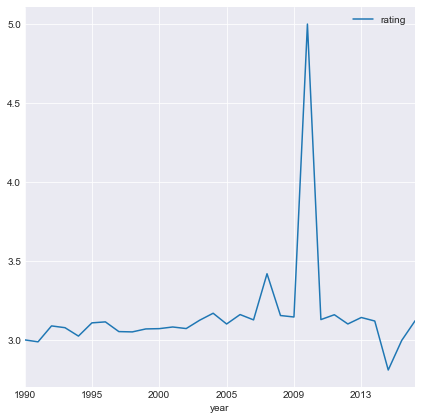

In [89]:
yearly_average[-30:].plot(x='year', y='rating', figsize=(7,7), grid=True)